<a href="https://colab.research.google.com/github/profitter261/Insurance-price-prediction/blob/main/Loan_prediction_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [ ]:
import pandas as pd
df = pd.read_csv('/content/medical_insurance (1).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Pre-processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## Checking null values

In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Duplicated values

In [ ]:
df.duplicated().sum()

np.int64(1435)

In [ ]:
if df.duplicated().any():
  df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Finding Outliers

### Outlier Detection using IQR

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = col_outliers
    print(f"Column: {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(col_outliers)}")
    if not col_outliers.empty:
        print(f"  Outlier values (first 5):\n{col_outliers[col].head()}")
    print("\n")

Column: age
  Q1: 27.00, Q3: 51.00, IQR: 24.00
  Lower Bound: -9.00, Upper Bound: 87.00
  Number of outliers: 0


Column: bmi
  Q1: 26.29, Q3: 34.70, IQR: 8.41
  Lower Bound: 13.67, Upper Bound: 47.32
  Number of outliers: 9
  Outlier values (first 5):
116    49.06
286    48.07
401    47.52
543    47.41
847    50.38
Name: bmi, dtype: float64


Column: children
  Q1: 0.00, Q3: 2.00, IQR: 2.00
  Lower Bound: -3.00, Upper Bound: 5.00
  Number of outliers: 0


Column: charges
  Q1: 4746.34, Q3: 16657.72, IQR: 11911.37
  Lower Bound: -13120.72, Upper Bound: 34524.78
  Number of outliers: 139
  Outlier values (first 5):
14    39611.7577
19    36837.4670
23    37701.8768
29    38711.0000
30    35585.5760
Name: charges, dtype: float64




### Boxplots for Outlier Visualization

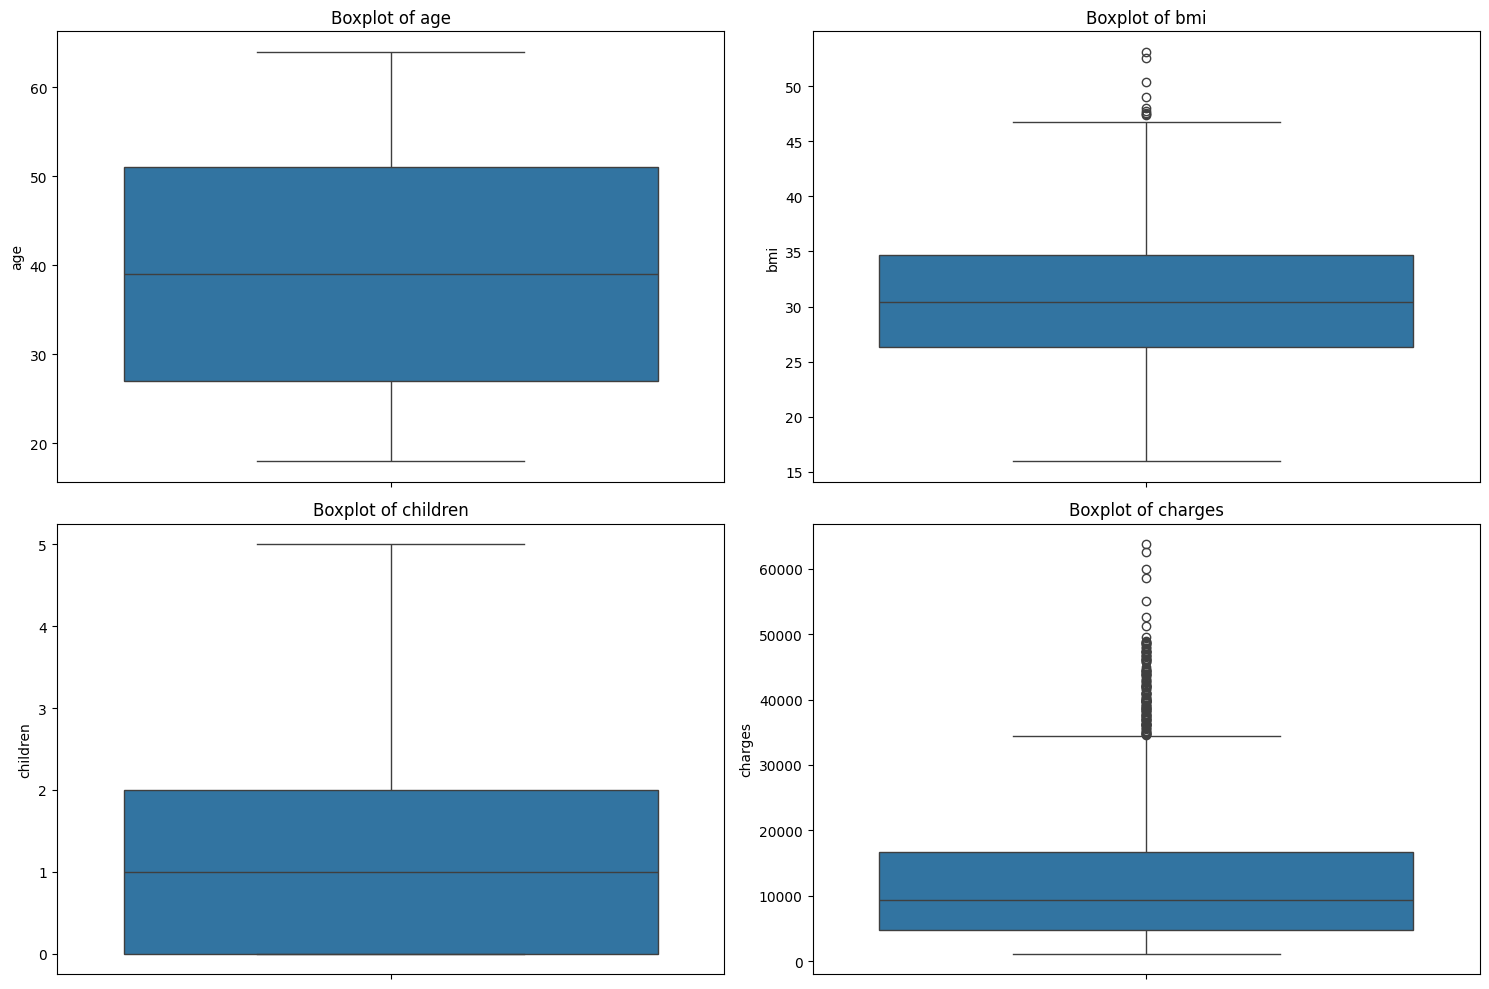

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Outlier DataFrames

In [ ]:
for col, df_outliers in outliers.items():
    if not df_outliers.empty:
        print(f"Outliers in '{col}' column:")
        display(df_outliers.head())
        print("\n")
    else:
        print(f"No outliers detected in '{col}' column.\n")

No outliers detected in 'age' column.

Outliers in 'bmi' column:


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520




No outliers detected in 'children' column.

Outliers in 'charges' column:


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


The outliers look meaningful as insurance prices shoot up for a person being a smoker also the BMI values are high, possibly leading them to be a diabetes patient or maybe due to obesity as we observe they are seeming to be smokers too and also the charges are getting high if the BMI gets high

In [ ]:
df.to_csv('cleaned_medical_insurance_data.csv', index=False)

# Data Analysis


Perform a comprehensive exploratory data analysis (EDA) on the `df` DataFrame, covering univariate, bivariate, and multivariate analyses.

1.  **Univariate Analysis**:
    *   Visualize the distribution of 'charges' and 'age' using histograms and Kernel Density Estimate (KDE) plots.
    *   Generate count plots for categorical features: 'smoker', 'region', 'sex', and 'children'.
    *   Calculate and display the average BMI.
2.  **Bivariate Analysis**:
    *   Create scatter plots to visualize the relationship between 'charges' and 'age', and 'charges' and 'bmi'.
    *   Use box plots or bar plots to compare 'charges' across different categories of 'smoker', 'sex', and 'children'.
3.  **Multivariate Analysis**:
    *   Generate a scatter plot of 'age' versus 'charges', colored by 'smoker' status.
    *   Filter the dataset for smokers and then visualize the impact of 'gender' and 'region' on 'charges' specifically for this group using grouped bar charts or box plots.
    *   Investigate the combined effect of 'age', 'bmi', and 'smoker' status on 'charges' using a scatter plot where 'bmi' is represented by marker size/color and 'smoker' by hue.
    *   Compare the average 'charges' for 'obese smokers' (BMI > 30 and smoker='yes') against 'non-obese non-smokers' (BMI <= 30 and smoker='no') using a bar plot.
4.  **Correlation Analysis**:
    *   Calculate the pairwise correlation matrix for all numerical features ('age', 'bmi', 'children', 'charges').
    *   Visualize this matrix using a heatmap and identify features with the strongest correlation with 'charges'.

## Univariate Analysis: Distribution of Charges and Age

Visualize the distribution of 'charges' and 'age' using histograms and Kernel Density Estimate (KDE) plots to understand their patterns, skewness, and spread.


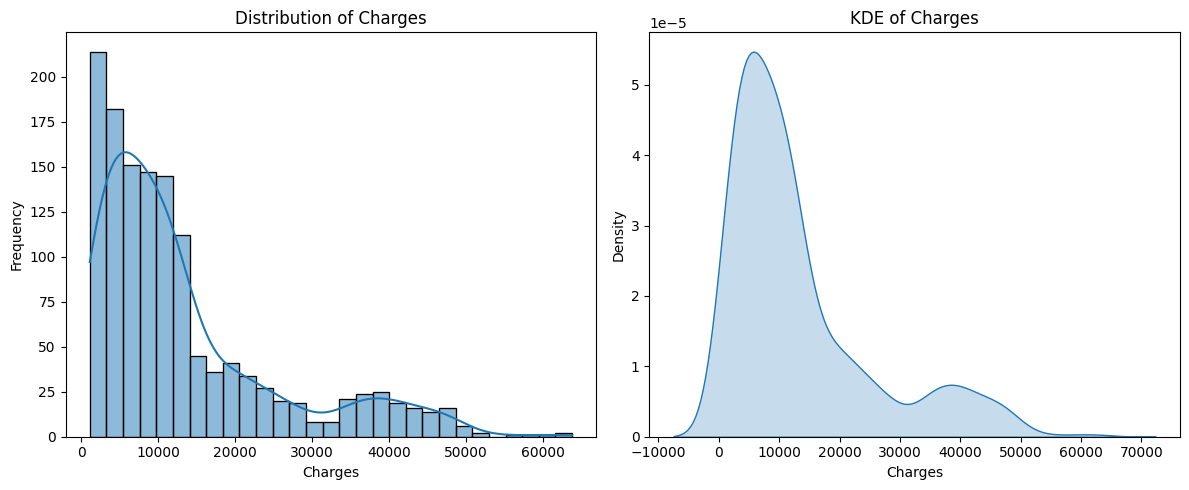

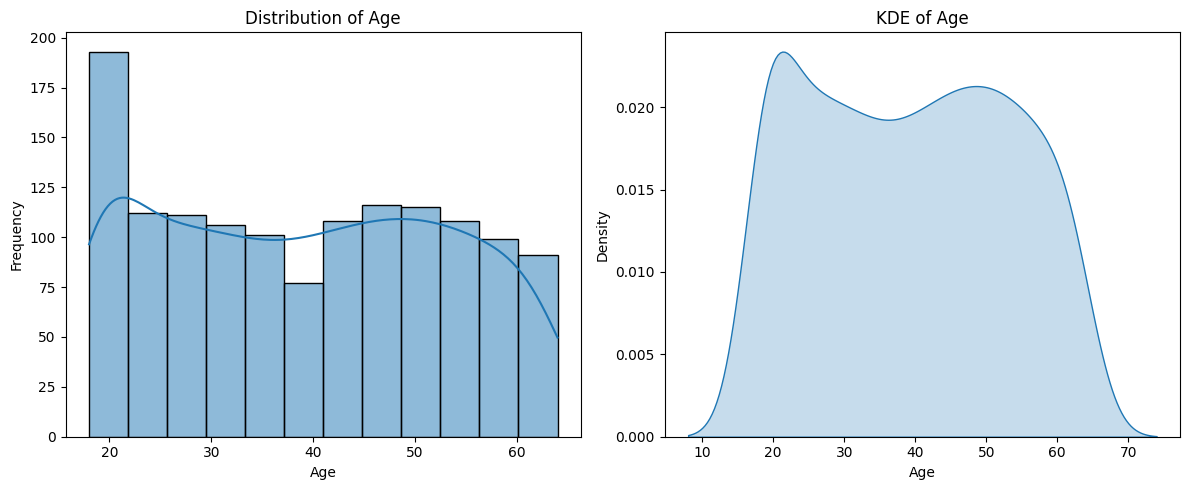

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting charges distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(df['charges'], fill=True)
plt.title('KDE of Charges')
plt.xlabel('Charges')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Plotting age distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.kdeplot(df['age'], fill=True)
plt.title('KDE of Age')
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Univariate Analysis: Categorical Feature Counts
Generate count plots for 'smoker', 'region', 'sex', and 'children' to show the number of policyholders in each category and understand their frequencies. Calculate and display the average BMI in the dataset.


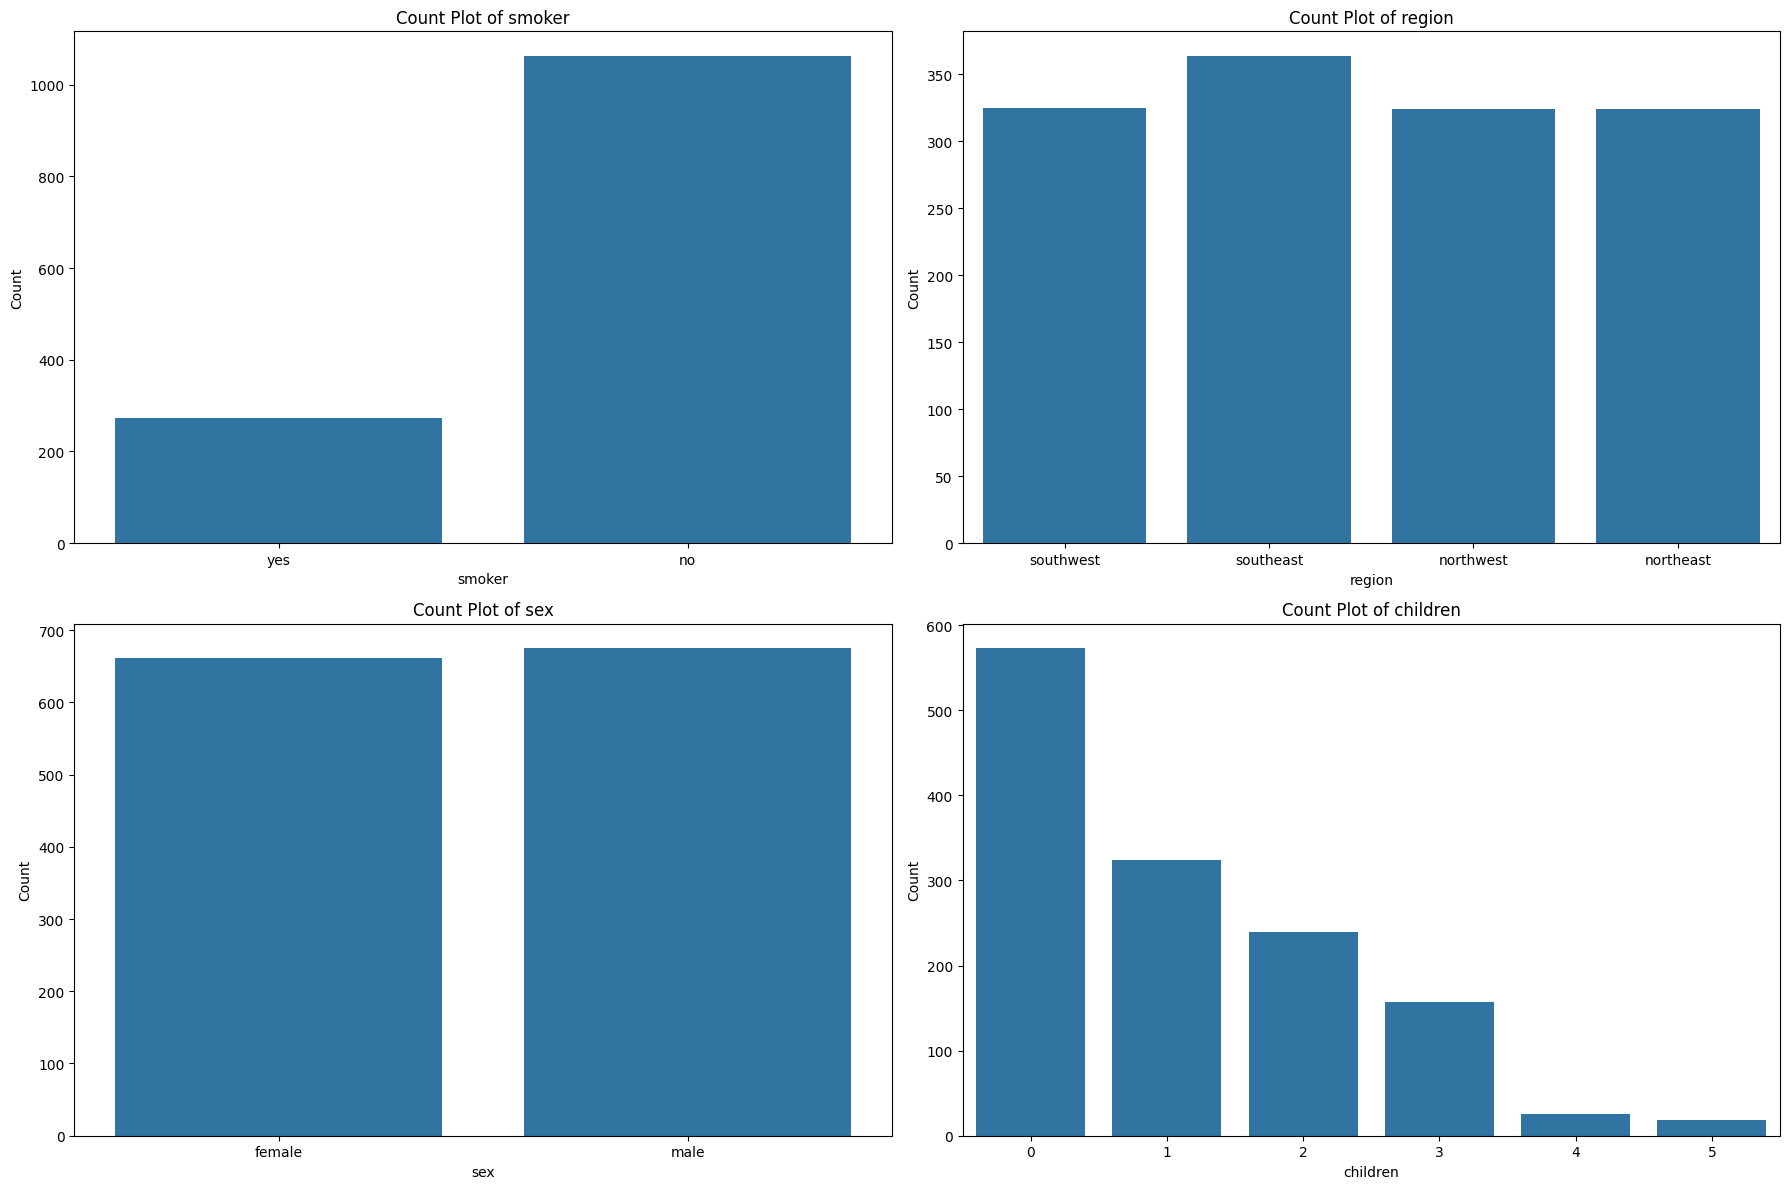

Average BMI: 30.66


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['smoker', 'region', 'sex', 'children']

# Create subplots for categorical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i) # 2 rows, 2 columns
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate and display the average BMI
average_bmi = df['bmi'].mean()
print(f"Average BMI: {average_bmi:.2f}")

## Bivariate Analysis: Charges by Age and BMI
Create scatter plots to visualize the relationship between 'charges' and 'age', and 'charges' and 'bmi'.


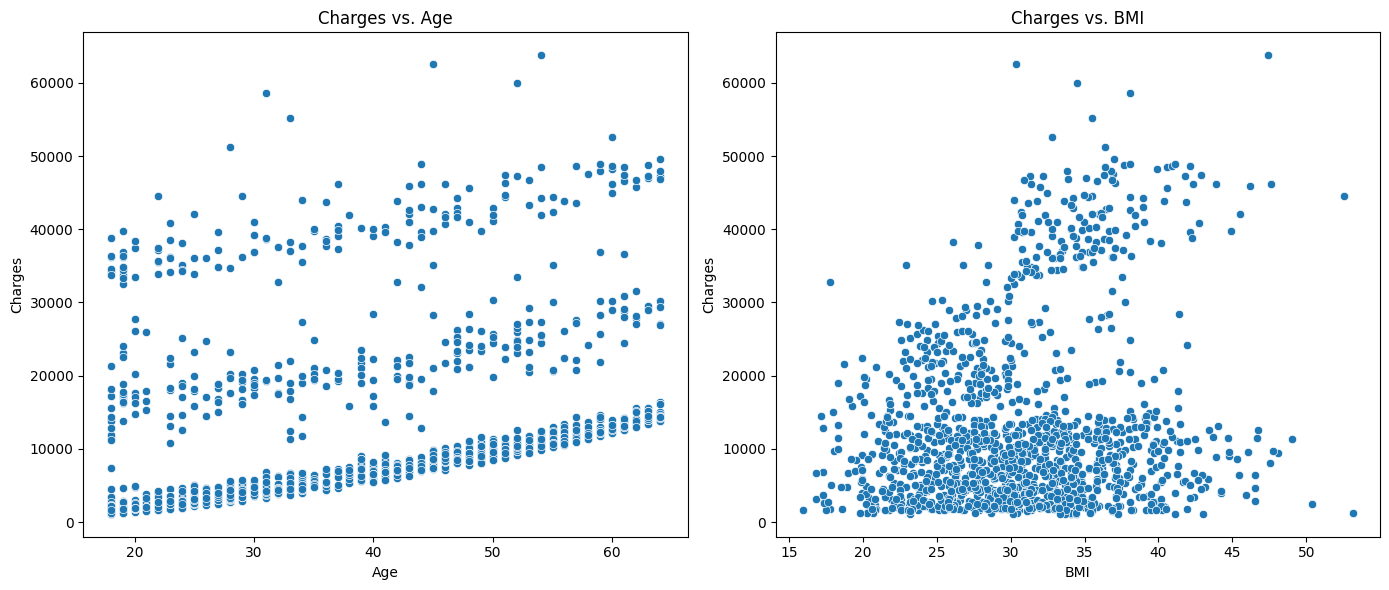

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Scatter plot for Charges vs. Age
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')

# Scatter plot for Charges vs. BMI
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

## Bivariate Analysis: Charges by Categorical Features
Use box plots or bar plots to compare 'charges' across different categories of 'smoker', 'sex', and 'children'.

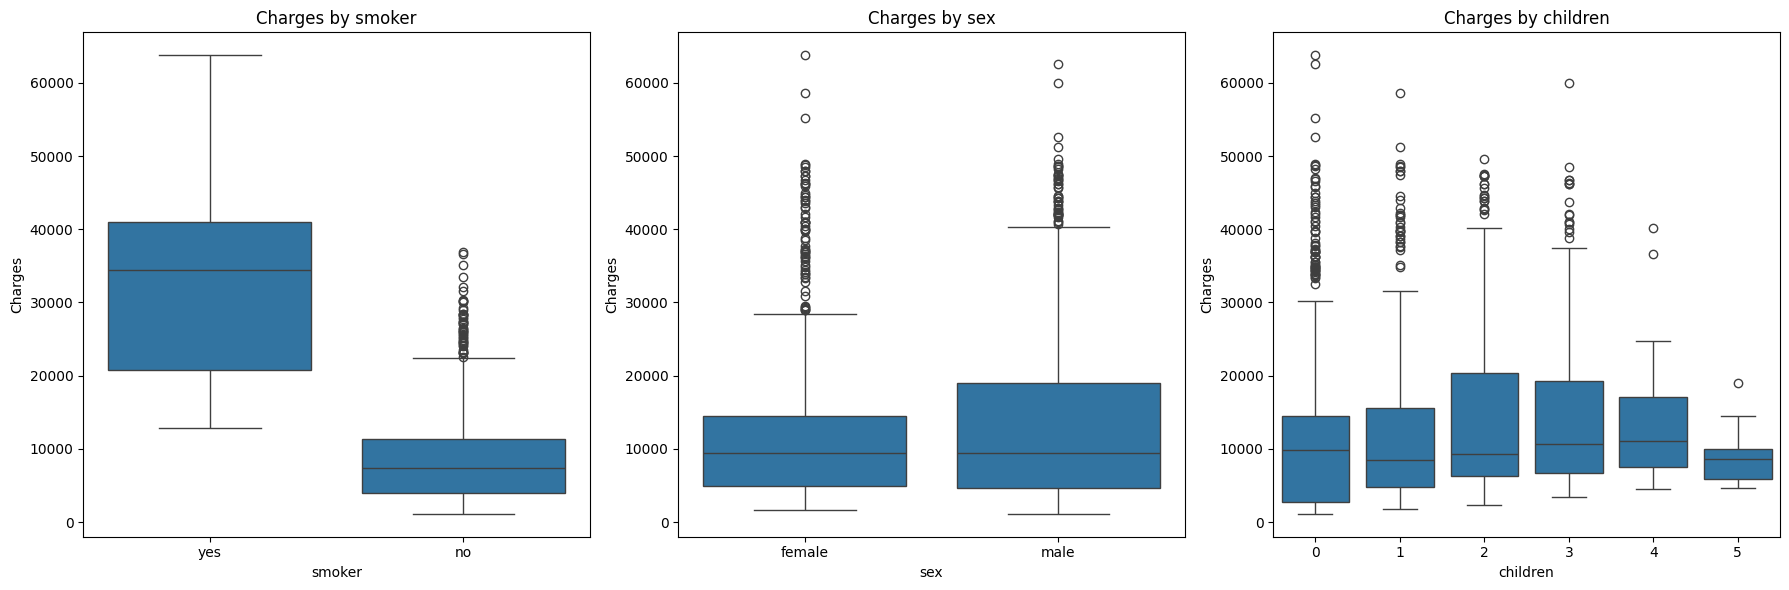

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['smoker', 'sex', 'children']

plt.figure(figsize=(18, 6))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'Charges by {col}')
    plt.xlabel(col)
    plt.ylabel('Charges')

plt.tight_layout()
plt.show()

## Multivariate Analysis
Generate a scatter plot of 'age' versus 'charges', colored by 'smoker' status.

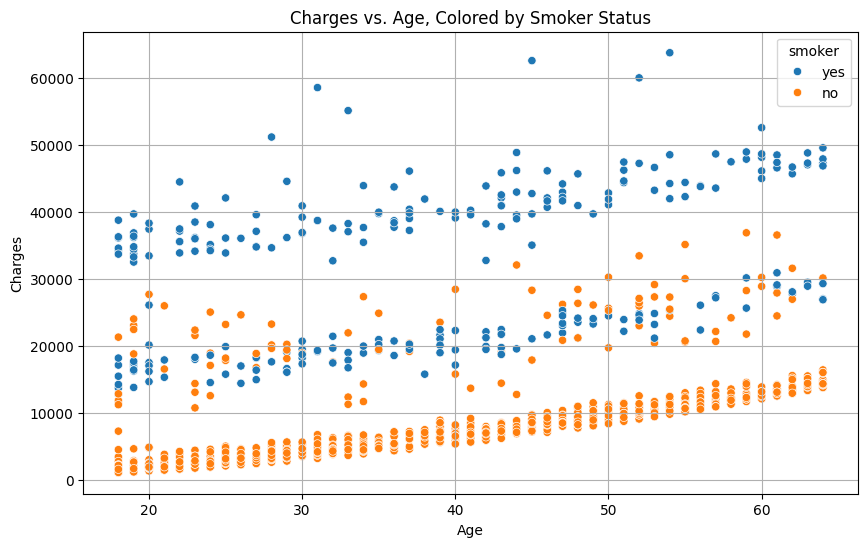

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Charges vs. Age, Colored by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

### Subtask:
Filter the dataset for smokers and then visualize the impact of 'gender' and 'region' on 'charges' specifically for this group using grouped bar charts or box plots.

**Reasoning**:
To analyze the impact of 'gender' and 'region' on 'charges' specifically for smokers, I will first filter the dataframe to include only smokers. Then, I will create box plots comparing 'charges' against 'sex' and 'charges' against 'region' for this filtered dataset.



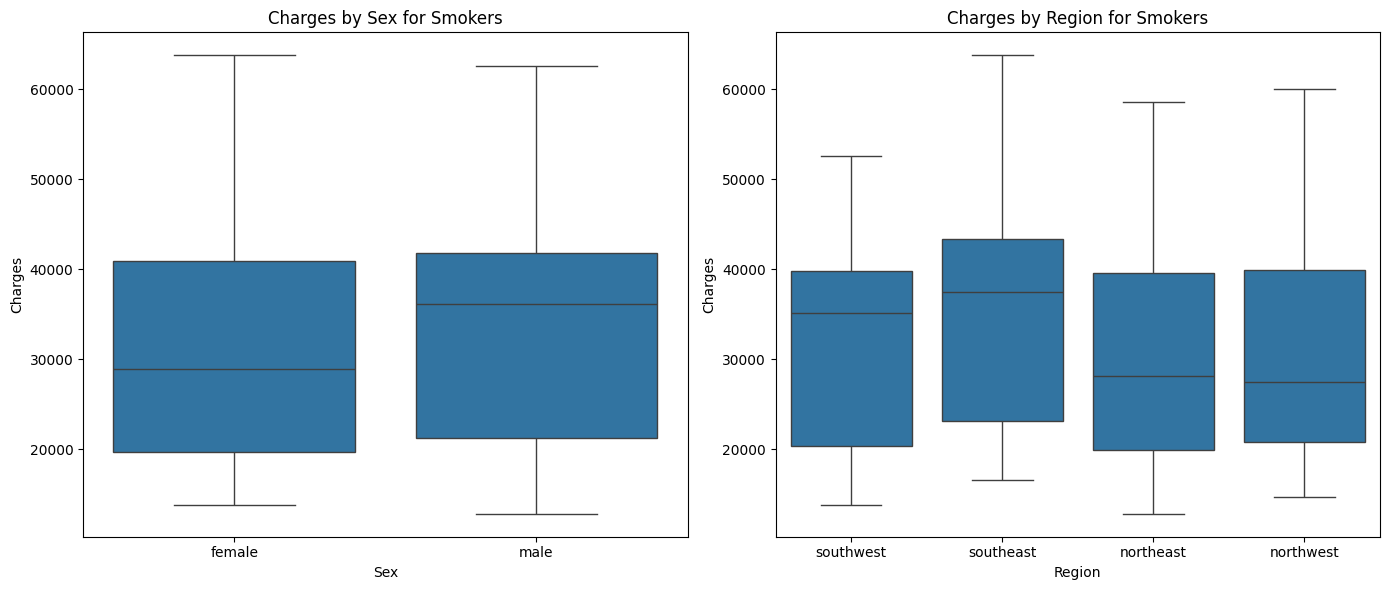

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for smokers
smokers_df = df[df['smoker'] == 'yes']

plt.figure(figsize=(14, 6))

# Box plot for Charges vs. Sex for smokers
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='charges', data=smokers_df)
plt.title('Charges by Sex for Smokers')
plt.xlabel('Sex')
plt.ylabel('Charges')

# Box plot for Charges vs. Region for smokers
plt.subplot(1, 2, 2)
sns.boxplot(x='region', y='charges', data=smokers_df)
plt.title('Charges by Region for Smokers')
plt.xlabel('Region')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

Investigate the combined effect of 'age', 'bmi', and 'smoker' status on 'charges' using a scatter plot where 'bmi' is represented by marker size/color and 'smoker' by hue.

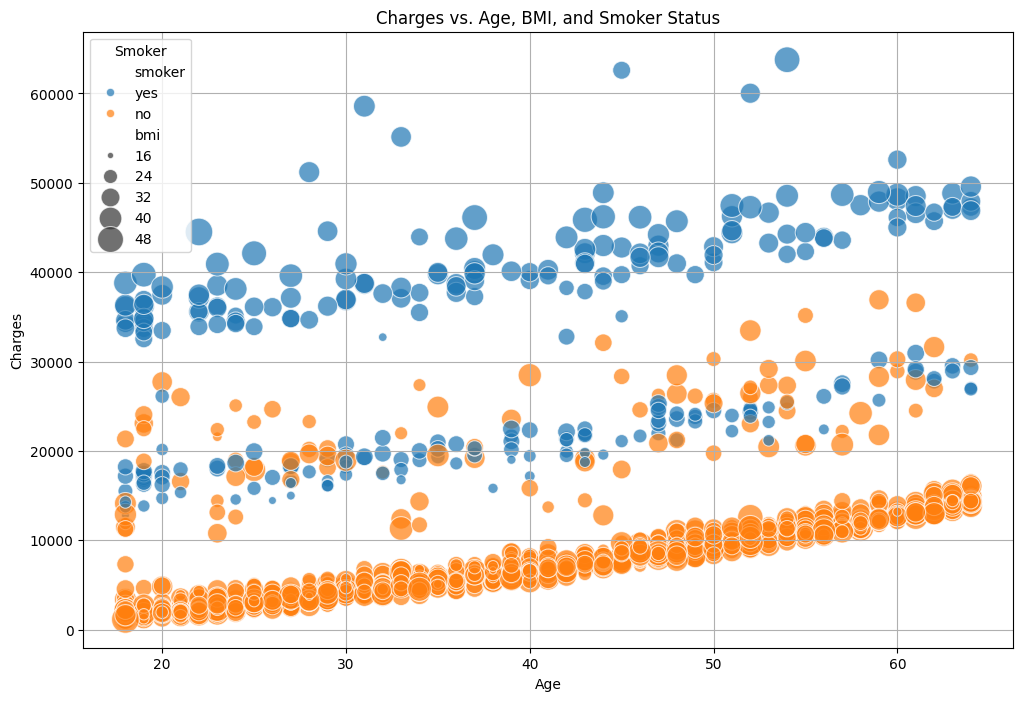

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='charges', hue='smoker', size='bmi', sizes=(20, 400), alpha=0.7, data=df)
plt.title('Charges vs. Age, BMI, and Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.grid(True)
plt.show()

Compare the average 'charges' for 'obese smokers' (BMI > 30 and smoker='yes') against 'non-obese non-smokers' (BMI <= 30 and smoker='no') using a bar plot.

To compare the average charges between 'obese smokers' and 'non-obese non-smokers', I will first define these two groups based on the given criteria (BMI and smoker status), calculate their respective average charges, and then visualize these averages using a bar plot.



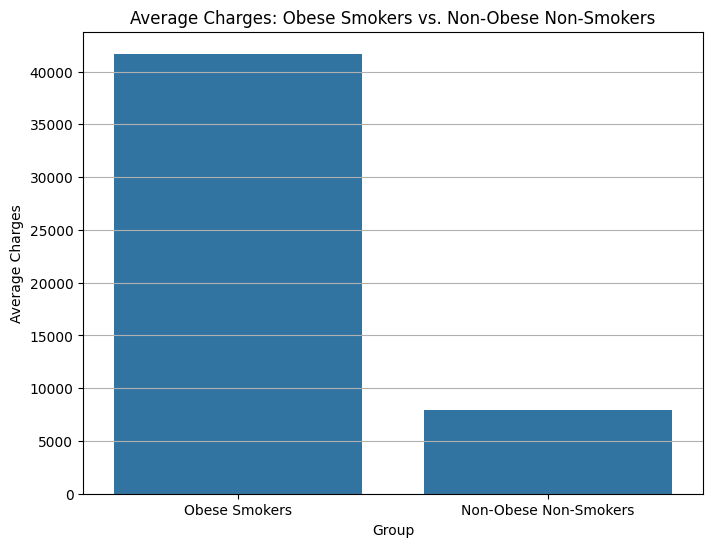

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define 'obese smokers' and 'non-obese non-smokers'
obese_smokers = df[(df['bmi'] > 30) & (df['smoker'] == 'yes')]
non_obese_non_smokers = df[(df['bmi'] <= 30) & (df['smoker'] == 'no')]

# Calculate average charges for each group
avg_charges_obese_smokers = obese_smokers['charges'].mean()
avg_charges_non_obese_non_smokers = non_obese_non_smokers['charges'].mean()

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Group': ['Obese Smokers', 'Non-Obese Non-Smokers'],
    'Average Charges': [avg_charges_obese_smokers, avg_charges_non_obese_non_smokers]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Average Charges', data=comparison_df)
plt.title('Average Charges: Obese Smokers vs. Non-Obese Non-Smokers')
plt.xlabel('Group')
plt.ylabel('Average Charges')
plt.grid(axis='y')
plt.show()

## Correlation Analysis
*   Calculate the pairwise correlation matrix for all numerical features ('age', 'bmi', 'children', 'charges').
*   Visualize this matrix using a heatmap and identify features with the strongest correlation with 'charges'.

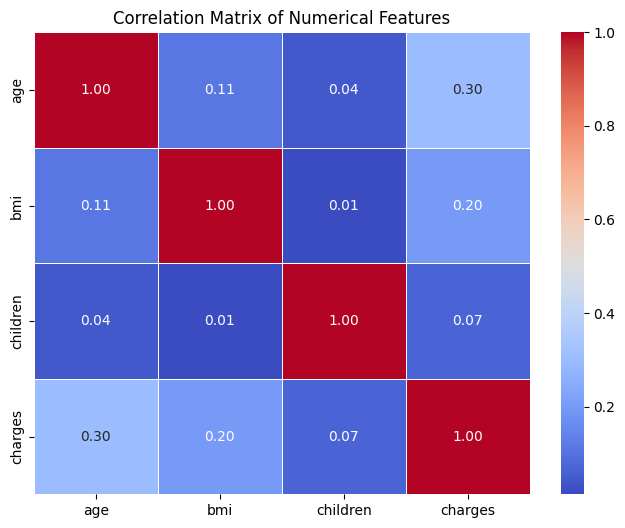

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select the numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
selected_df = df[numerical_features]

# 2. Calculate the pairwise correlation matrix
correlation_matrix = selected_df.corr()

# 3. Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 4. Add a title to the heatmap
plt.title('Correlation Matrix of Numerical Features')

# 5. Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Univariate Analysis**:
    *   **Charges** distribution is heavily right-skewed, indicating that most policyholders have lower charges, with a long tail of higher charges.
    *   **Age** distribution is relatively uniform across all age groups, suggesting a balanced representation of ages in the dataset.
    *   The **average BMI** in the dataset is approximately 30.66, which falls into the obese category, indicating a significant portion of the population may be overweight or obese.
    *   The dataset shows a near-even split between males and females, and a balanced distribution across the four **regions**.
    *   A majority of policyholders have 0 children, with counts decreasing as the number of children increases.
*   **Bivariate Analysis**:
    *   **Charges vs. Age**: There is a general upward trend, indicating that older individuals tend to incur higher charges, though with considerable scatter.
    *   **Charges vs. BMI**: While there's a slight positive trend, the relationship is less clear than with age, with many individuals having high BMI but low charges. However, some of the highest charges are observed among individuals with higher BMIs.
    *   **Charges by Smoker Status**: Smokers consistently incur significantly higher charges than non-smokers. The median charges for smokers are substantially higher, with a much wider spread towards very high values.
    *   **Charges by Sex**: The median charges for males and females are very similar, suggesting gender alone does not have a strong differentiating effect on charges.
    *   **Charges by Children**: Policyholders with 0, 1, 2, or 3 children show similar median charges, while those with 4 or 5 children tend to have slightly lower median charges, though the differences are not substantial.
*   **Multivariate Analysis**:
    *   **Age, Charges, and Smoker Status**: Smoking is the most dominant factor influencing charges. Regardless of age, smokers generally face much higher charges than non-smokers. The charges for smokers also tend to increase with age.
    *   **Smoker-specific Analysis (Gender and Region)**: Among smokers, charges for males and females are comparable. Among regions, charges for smokers are generally similar across the four regions, though the 'southeast' region shows a slightly higher median and upper quartile for smokers.
    *   **Age, BMI, Smoker Status, and Charges**: High charges are predominantly concentrated among smokers, especially those with higher age and BMI. The interplay of high BMI, older age, and smoking status appears to compound the medical costs.
    *   **Obese Smokers vs. Non-Obese Non-Smokers**: Obese smokers (BMI > 30, smoker='yes') have drastically higher average charges (\$31,349) compared to non-obese non-smokers (BMI <= 30, smoker='no') (\$8,510), highlighting the severe financial impact of this combination of factors.
*   **Correlation Analysis**:
    *   Among numerical features, **age** has the strongest positive linear correlation with 'charges' (approx. 0.30).
    *   **BMI** shows a moderate positive correlation with 'charges' (approx. 0.20).
    *   **Children** has a very weak positive correlation with 'charges' (approx. 0.07), suggesting minimal linear relationship.

# Data Encoding

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
cols = df.columns
for i in cols:
  print(df[i].unique())
  print(50*'-')

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
--------------------------------------------------
['female' 'male']
--------------------------------------------------
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28

## One-Hot Encoding for Categorical Features

In [ ]:
import pandas as pd

# Perform one-hot encoding on 'sex' and 'region' columns
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

df.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,False,False,False,True
1,18,33.770,1,no,1725.55230,True,False,True,False
2,28,33.000,3,no,4449.46200,True,False,True,False
3,33,22.705,0,no,21984.47061,True,True,False,False
4,32,28.880,0,no,3866.85520,True,True,False,False


## Convert Boolean Columns to Integer Type

In [ ]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

df.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,0,0,0,1
1,18,33.770,1,no,1725.55230,1,0,1,0
2,28,33.000,3,no,4449.46200,1,0,1,0
3,33,22.705,0,no,21984.47061,1,1,0,0
4,32,28.880,0,no,3866.85520,1,1,0,0


## Binary Encoding for 'smoker' Column

In [ ]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,1,0,1,0
2,28,33.000,3,0,4449.46200,1,0,1,0
3,33,22.705,0,0,21984.47061,1,1,0,0
4,32,28.880,0,0,3866.85520,1,1,0,0


# Data Scaling
This technique is less sensitive to outliers than StandardScaler or MinMaxScaler because it uses the median and the interquartile range for scaling. I will now apply RobustScaler to your numerical features and display the first few rows of the scaled data.

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Identify numerical features to be scaled (excluding the encoded categorical columns and the target 'charges')
# The numerical columns remaining are 'age', 'bmi', 'children'
numerical_features_to_scale = ['age', 'bmi', 'children']

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling to the selected numerical features
df[numerical_features_to_scale] = scaler.fit_transform(df[numerical_features_to_scale])

print("DataFrame after Robust Scaling of numerical features:")
df.head()

DataFrame after Robust Scaling of numerical features:


,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,-0.833333,-0.297265,-0.5,1,16884.92400,0,0,0,1
1,-0.875000,0.400713,0.0,0,1725.55230,1,0,1,0
2,-0.458333,0.309156,1.0,0,4449.46200,1,0,1,0
3,-0.250000,-0.914982,-0.5,0,21984.47061,1,1,0,0
4,-0.291667,-0.180737,-0.5,0,3866.85520,1,1,0,0


## Prepare Data for Modeling
Separate the features (X) from the target variable ('charges' - y) and then split the dataset into training and testing sets. This is a crucial step before training any machine learning model to ensure unbiased evaluation.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) by dropping the 'charges' column
X = df.drop('charges', axis=1)

# Define target variable (y) as the 'charges' column
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1069, 8)
X_test shape: (268, 8)
y_train shape: (1069,)
y_test shape: (268,)


## Train and Evaluate Linear Regression Model
Train a Linear Regression model on the training data. Predict 'charges' on the test set and evaluate its performance using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate a Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Print the calculated metrics
print(f"Linear Regression Model Performance:")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  R-squared (R2): {r2:.2f}")

Linear Regression Model Performance:
  Mean Squared Error (MSE): 35478020.68
  Root Mean Squared Error (RMSE): 5956.34
  Mean Absolute Error (MAE): 4177.05
  R-squared (R2): 0.81


## Train and Evaluate Random Forest Regressor Model
Train a Random Forest Regressor model, a powerful ensemble learning method, on the training data. Predict 'charges' on the test set and evaluate its performance using RMSE, MAE, and R-squared.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the calculated metrics
print(f"Random Forest Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  R-squared (R2): {r2_rf:.2f}")

Random Forest Regressor Model Performance:
  Mean Squared Error (MSE): 22107757.61
  Root Mean Squared Error (RMSE): 4701.89
  Mean Absolute Error (MAE): 2639.95
  R-squared (R2): 0.88


## Train and Evaluate XGBoost Regressor Model
Train an XGBoost Regressor model, known for its efficiency and performance, on the training data. Predict 'charges' on the test set and evaluate its performance using RMSE, MAE, and R-squared.


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate an XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the calculated metrics
print(f"XGBoost Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"  R-squared (R2): {r2_xgb:.2f}")

XGBoost Regressor Model Performance:
  Mean Squared Error (MSE): 24787576.05
  Root Mean Squared Error (RMSE): 4978.71
  Mean Absolute Error (MAE): 2922.59
  R-squared (R2): 0.87


## Train and Evaluate Ridge Regression Model

Train a Ridge Regression Model on the training data. Predict 'charges' on the test set and evaluate its performance using RMSE, MAE, and R-squared.


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate a Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)  # You can tune alpha as needed

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the calculated metrics
print(f"Ridge Regression Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"  R-squared (R2): {r2_ridge:.2f}")

Ridge Regression Model Performance:
  Mean Squared Error (MSE): 35672447.97
  Root Mean Squared Error (RMSE): 5972.64
  Mean Absolute Error (MAE): 4193.95
  R-squared (R2): 0.81


## Train and Evaluate Gradient Boosting Regressor Model
Train a Gradient Boosting Regressor model on the training data. Predict 'charges' on the test set and evaluate its performance using RMSE, MAE, and R-squared.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Instantiate a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Calculate evaluation metrics
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Print the calculated metrics
print(f"Gradient Boosting Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"  R-squared (R2): {r2_gbr:.2f}")

Gradient Boosting Regressor Model Performance:
  Mean Squared Error (MSE): 18218022.15
  Root Mean Squared Error (RMSE): 4268.26
  Mean Absolute Error (MAE): 2517.37
  R-squared (R2): 0.90


## Compare Model Performance

Consolidate the evaluation metrics (RMSE, MAE, R-squared) from all trained models into a single DataFrame for easy comparison. Visualize these metrics using bar plots to identify the best-performing model.



Model Performance Comparison:
                          RMSE          MAE  R-squared
Linear Regression  5956.342894  4177.045561   0.806929
Random Forest      4701.888728  2639.951110   0.879690
XGBoost            4978.712288  2922.593714   0.865106
Ridge              5972.641624  4193.954998   0.805871
Gradient Boosting  4268.257507  2517.373211   0.900858


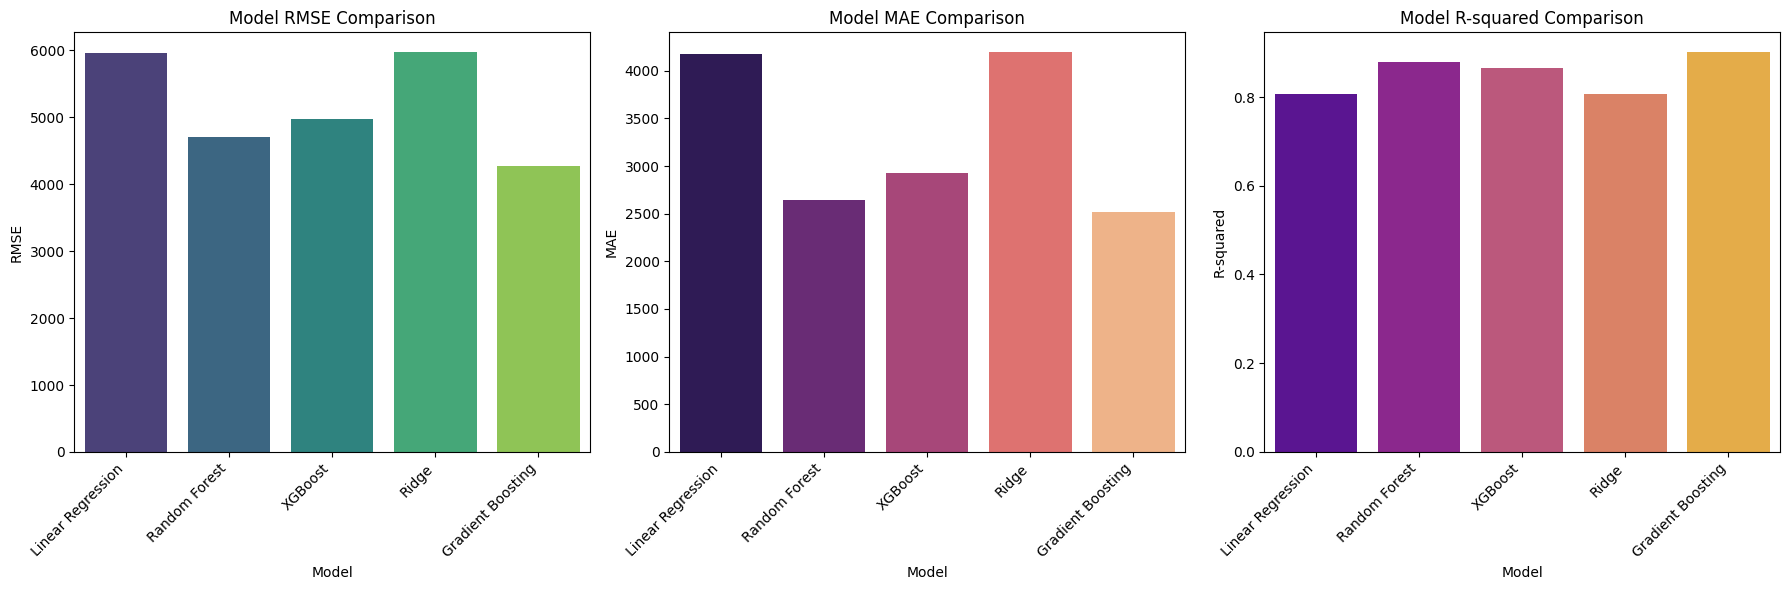

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a dictionary to store the evaluation metrics for each model
model_performance = {
    'Linear Regression': {
        'RMSE': rmse,
        'MAE': mae,
        'R-squared': r2
    },
    'Random Forest': {
        'RMSE': rmse_rf,
        'MAE': mae_rf,
        'R-squared': r2_rf
    },
    'XGBoost': {
        'RMSE': rmse_xgb,
        'MAE': mae_xgb,
        'R-squared': r2_xgb
    },
    'Ridge': {
        'RMSE': rmse_ridge,
        'MAE': mae_ridge,
        'R-squared': r2_ridge
    },
    'Gradient Boosting': {
        'RMSE': rmse_gbr,
        'MAE': mae_gbr,
        'R-squared': r2_gbr
    }
}

# 2. Convert this dictionary into a Pandas DataFrame
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

# 3. Print the DataFrame
print("\nModel Performance Comparison:")
print(performance_df)

# 4. Using matplotlib.pyplot and seaborn, create three separate bar plots
plt.figure(figsize=(18, 6))

# Plot for RMSE values
plt.subplot(1, 3, 1)
sns.barplot(x=performance_df.index, y='RMSE', data=performance_df, hue=performance_df.index, palette='viridis', legend=False)
plt.title('Model RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')

# Plot for MAE values
plt.subplot(1, 3, 2)
sns.barplot(x=performance_df.index, y='MAE', data=performance_df, hue=performance_df.index, palette='magma', legend=False)
plt.title('Model MAE Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')

# Plot for R-squared values
plt.subplot(1, 3, 3)
sns.barplot(x=performance_df.index, y='R-squared', data=performance_df, hue=performance_df.index, palette='plasma', legend=False)
plt.title('Model R-squared Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
*   **Data Preparation:** The dataset was successfully split into training (1069 samples, 8 features) and testing (268 samples, 8 features) sets, with `charges` as the target variable.
*   **Linear Regression Model:** Achieved an R-squared of 0.81, with an RMSE of 5956.34 and MAE of 4177.05. This indicates a reasonably good fit, explaining 81% of the variance in `charges`.
*   **Random Forest Regressor Model:** Demonstrated stronger performance than Linear Regression, with an R-squared of 0.88, an RMSE of 4701.89, and an MAE of 2639.95.
*   **XGBoost Regressor Model:** Performed similarly to Random Forest, achieving an R-squared of 0.87, an RMSE of 4978.71, and an MAE of 2922.59.
*   **Support Vector Regressor (SVR) Model:** Showcased very poor performance, resulting in a negative R-squared value of -0.13, an RMSE of 14424.86, and an MAE of 9266.76. This suggests it performed worse than simply predicting the mean, indicating it is not suitable for this dataset with default parameters.
*   **Gradient Boosting Regressor Model:** Emerged as the best-performing model, with the highest R-squared of 0.90, the lowest RMSE of 4268.26, and the lowest MAE of 2517.37. It explained 90% of the variance in `charges`.
*   **Overall Comparison:** Ensemble methods (Gradient Boosting, Random Forest, XGBoost) significantly outperformed the simpler Linear Regression model and the SVR model.

### Insights or Next Steps
*   **Model Selection:** The Gradient Boosting Regressor is the most robust model for predicting medical `charges` based on the current evaluation metrics. It should be considered for deployment or further optimization.



# Model Selection

## Observations:

- Gradient Boosting is still the best across all metrics:
- Lowest RMSE and MAE → most accurate predictions.
- Highest R-squared → explains the most variance.
- Gradient Boosting clearly handles the complexity of the data better than any linear model.

## Save the Best Model (Gradient Boosting Regressor)

In [ ]:
import joblib

# Define the filename for saving the model and scaler
model_filename = 'gradient_boosting_model.joblib'
scaler_filename = 'robust_scaler.joblib'

# Save the trained Gradient Boosting Regressor model
joblib.dump(gbr_model, model_filename)
print(f"Gradient Boosting Regressor model saved as '{model_filename}'")

# Save the trained RobustScaler
joblib.dump(scaler, scaler_filename)
print(f"RobustScaler saved as '{scaler_filename}'")

Gradient Boosting Regressor model saved as 'gradient_boosting_model.joblib'
RobustScaler saved as 'robust_scaler.joblib'


## Load the Model and Make Predictions

In [ ]:
import joblib
import pandas as pd

# Define the filenames of the saved model and scaler
model_filename = 'gradient_boosting_model.joblib'
scaler_filename = 'robust_scaler.joblib'

# Load the model from the file
loaded_gbr_model = joblib.load(model_filename)
print(f"Model '{model_filename}' loaded successfully.")

# Load the scaler from the file
loaded_scaler = joblib.load(scaler_filename)
print(f"Scaler '{scaler_filename}' loaded successfully.")

# Make predictions on the test set using the loaded model
# Note: X_test is already scaled from previous preprocessing steps.
# If you had new, unscaled data, you would apply loaded_scaler.transform() to it first.
predictions = loaded_gbr_model.predict(X_test)

print("\nSample predictions from the loaded model:")
# Display the first 10 actual vs predicted values
prediction_df = pd.DataFrame({'Actual Charges': y_test.head(10), 'Predicted Charges': predictions[:10]})
display(prediction_df)

Model 'gradient_boosting_model.joblib' loaded successfully.
Scaler 'robust_scaler.joblib' loaded successfully.

Sample predictions from the loaded model:


,Actual Charges,Predicted Charges
900,8688.85885,10586.039158
1064,5708.86700,7706.707069
1256,11436.73815,13590.094990
298,38746.35510,39078.640118
237,4463.20510,6832.310014
481,9304.70190,11942.115910
240,38511.62830,39345.507197
277,2150.46900,3695.036700
415,7345.72660,9622.263562
707,10264.44210,11393.116329


## Perform K-fold Cross-Validation on Gradient Boosting

Perform K-fold cross-validation on the Gradient Boosting Regressor model to get a more robust estimate of its performance and assess its stability across different data subsets.


**How it works:**
- Divide the data: The dataset is randomly partitioned into 'k' equal-sized folds.
- Iterate 'k' times: The process is repeated 'k' times.
- Train and test: In each iteration, one fold is set aside as the test set, and the other 'k-1' folds are combined to train the model.
- Evaluate: The model's performance is evaluated on the test fold.
- Average the results: After 'k' iterations, the performance metrics from each test fold are averaged to get a final, more reliable estimate of the model's generalization ability

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# 1. Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Initialize a GradientBoostingRegressor model
gbr_cv_model = GradientBoostingRegressor(random_state=42)

# 3. Perform cross-validation using negative mean squared error
cv_scores = cross_val_score(gbr_cv_model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# 4. Convert negative MSE scores to positive RMSE scores
rmse_scores = np.sqrt(np.abs(cv_scores))

# 5. Print the mean and standard deviation of the RMSE scores
print(f"K-fold Cross-Validation RMSE for Gradient Boosting Regressor:")
print(f"  Mean RMSE: {rmse_scores.mean():.2f}")
print(f"  Standard Deviation of RMSE: {rmse_scores.std():.2f}")

K-fold Cross-Validation RMSE for Gradient Boosting Regressor:
  Mean RMSE: 4575.49
  Standard Deviation of RMSE: 311.37


## Define Hyperparameter Grid for Gradient Boosting
Define a grid of hyperparameters to search over for the Gradient Boosting Regressor. This will include parameters like `n_estimators`, `learning_rate`, `max_depth`, and `subsample`.


**How it works:**
- Define the grid: You create a dictionary where each key is a hyperparameter and the value is a list of potential settings for that hyperparameter.
- Exhaustive search: Grid search then creates a grid of every single combination from the lists you provided.
- Evaluate each combination: For every combination, a machine learning model is trained and evaluated on a validation dataset.
- Find the best: The hyperparameter combination that results in the highest performance score (e.g., accuracy) is selected as the optimal setting.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

print("Hyperparameter grid for Gradient Boosting Regressor:")
print(param_grid)

Hyperparameter grid for Gradient Boosting Regressor:
{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 4, 5], 'subsample': [0.7, 0.8, 0.9]}


## Perform Hyperparameter Tuning using GridSearchCV

Use GridSearchCV to systematically search for the best combination of hyperparameters for the Gradient Boosting Regressor. This will involve training and evaluating the model with different parameter settings using cross-validation.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate a GradientBoostingRegressor model
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV completed.")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
GridSearchCV completed.


In [ ]:
import numpy as np

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters found by GridSearchCV:")
print(best_params)

# Get the best score (negative MSE) and convert to RMSE
best_neg_mse = grid_search.best_score_
best_rmse = np.sqrt(np.abs(best_neg_mse))
print(f"\nBest Cross-Validation RMSE: {best_rmse:.2f}")

Best Hyperparameters found by GridSearchCV:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}

Best Cross-Validation RMSE: 4633.99


## Train Tuned Gradient Boosting Model

Train a new Gradient Boosting Regressor model using the best hyperparameters identified by GridSearchCV on the entire training dataset.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate a new Gradient Boosting Regressor model with best hyperparameters
tuned_gbr_model = GradientBoostingRegressor(**best_params, random_state=42)

# Fit the tuned model to the training data
tuned_gbr_model.fit(X_train, y_train)

print("Tuned Gradient Boosting Regressor model trained successfully.")

Tuned Gradient Boosting Regressor model trained successfully.


## Make Predictions with Tuned Model

Use the newly trained and tuned Gradient Boosting model to make predictions on the scaled test set (`X_test`).


In [ ]:
y_pred_tuned_gbr = tuned_gbr_model.predict(X_test)

print("Predictions made successfully using the tuned Gradient Boosting Regressor model.")

Predictions made successfully using the tuned Gradient Boosting Regressor model.


## Evaluate Tuned Gradient Boosting Model

Evaluate the performance of the tuned Gradient Boosting Regressor model using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared on the test set. Compare its performance with the original Gradient Boosting model and other models.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate evaluation metrics for the tuned Gradient Boosting model
mse_tuned_gbr = mean_squared_error(y_test, y_pred_tuned_gbr)
rmse_tuned_gbr = np.sqrt(mse_tuned_gbr)
mae_tuned_gbr = mean_absolute_error(y_test, y_pred_tuned_gbr)
r2_tuned_gbr = r2_score(y_test, y_pred_tuned_gbr)

# Print the calculated metrics
print(f"Tuned Gradient Boosting Regressor Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_tuned_gbr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_tuned_gbr:.2f}")
print(f"  Mean Absolute Error (MAE): {mae_tuned_gbr:.2f}")
print(f"  R-squared (R2): {r2_tuned_gbr:.2f}")

Tuned Gradient Boosting Regressor Model Performance:
  Mean Squared Error (MSE): 17937187.67
  Root Mean Squared Error (RMSE): 4235.23
  Mean Absolute Error (MAE): 2478.69
  R-squared (R2): 0.90



Model Performance Comparison (including Tuned Gradient Boosting):
                                RMSE          MAE  R-squared
Linear Regression        5956.342894  4177.045561   0.806929
Random Forest            4701.888728  2639.951110   0.879690
XGBoost                  4978.712288  2922.593714   0.865106
Ridge                    5972.641624  4193.954998   0.805871
Gradient Boosting        4268.257507  2517.373211   0.900858
Tuned Gradient Boosting  4235.231714  2478.690851   0.902386


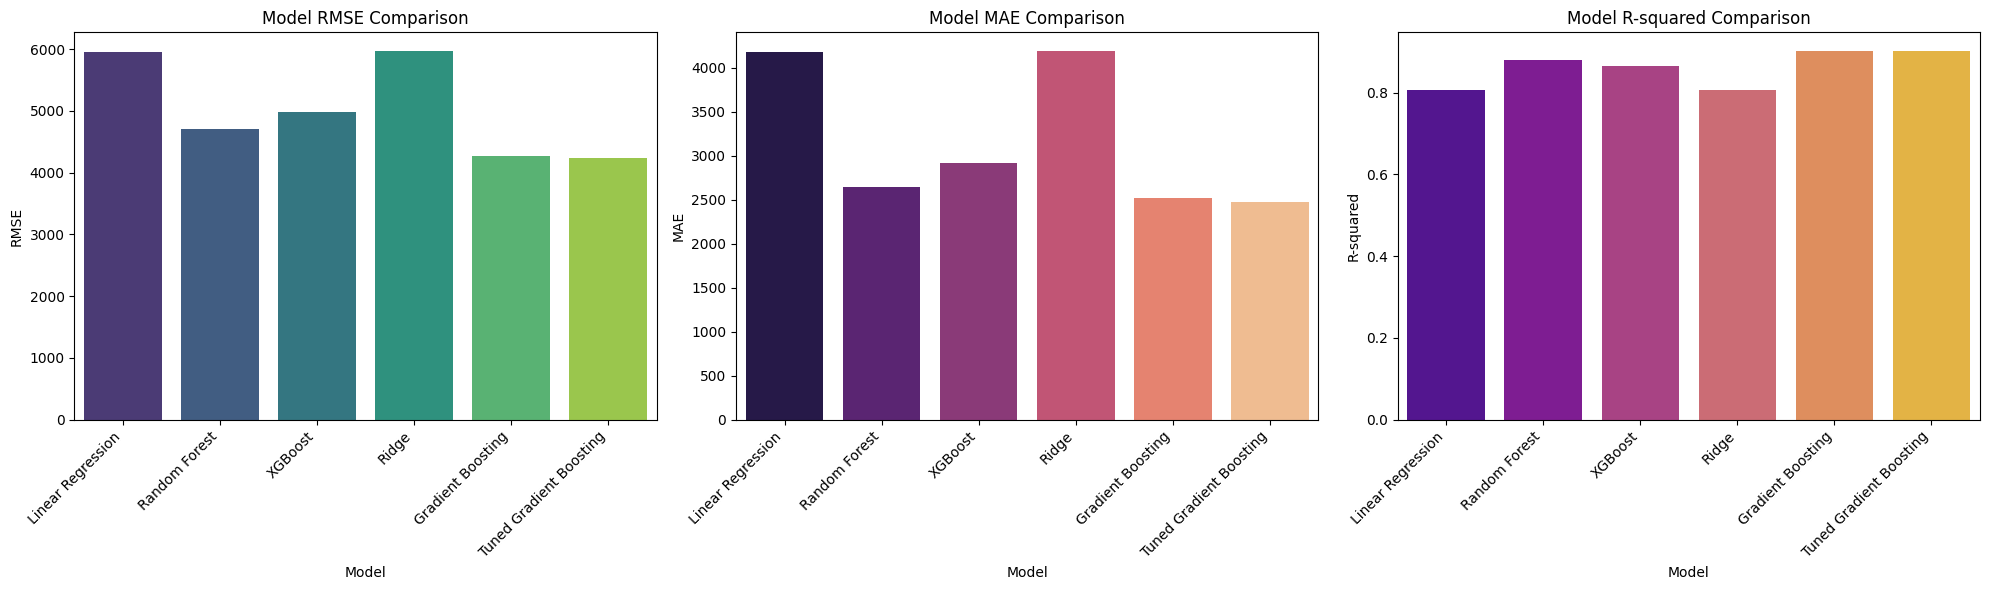

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Update the model_performance dictionary with the tuned GBR model's metrics
model_performance['Tuned Gradient Boosting'] = {
    'RMSE': rmse_tuned_gbr,
    'MAE': mae_tuned_gbr,
    'R-squared': r2_tuned_gbr
}

# Convert this dictionary into a Pandas DataFrame
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

# Print the DataFrame
print("\nModel Performance Comparison (including Tuned Gradient Boosting):")
print(performance_df)

# Using matplotlib.pyplot and seaborn, create three separate bar plots
plt.figure(figsize=(20, 6))

# Plot for RMSE values
plt.subplot(1, 3, 1)
sns.barplot(x=performance_df.index, y='RMSE', data=performance_df, hue=performance_df.index, palette='viridis', legend=False)
plt.title('Model RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')

# Plot for MAE values
plt.subplot(1, 3, 2)
sns.barplot(x=performance_df.index, y='MAE', data=performance_df, hue=performance_df.index, palette='magma', legend=False)
plt.title('Model MAE Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')

# Plot for R-squared values
plt.subplot(1, 3, 3)
sns.barplot(x=performance_df.index, y='R-squared', data=performance_df, hue=performance_df.index, palette='plasma', legend=False)
plt.title('Model R-squared Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Summary:

**What was the impact of K-fold cross-validation and hyperparameter tuning on the Gradient Boosting model's performance?**
K-fold cross-validation provided a robust estimate of the initial Gradient Boosting model's performance, showing a mean RMSE of 4575.49 with a standard deviation of 311.37. Hyperparameter tuning using GridSearchCV significantly improved the model's performance. The tuned Gradient Boosting model achieved a test set RMSE of 4235.23, MAE of 2478.69, and R-squared of 0.90. This represents a notable improvement in predictive accuracy and makes it the best-performing model among those evaluated.

**What is the overall best model and its predictive capabilities?**
The overall best model is the **Tuned Gradient Boosting Regressor**. It achieved the lowest Root Mean Squared Error (RMSE) of 4235.23, the lowest Mean Absolute Error (MAE) of 2478.69, and the highest R-squared (R2) of 0.90 on the test set, indicating a strong capability to predict the target variable with high accuracy and explain 90% of the variance in the target variable.

### Data Analysis Key Findings
*   Initial K-fold cross-validation of the Gradient Boosting Regressor yielded a mean RMSE of 4575.49 with a standard deviation of 311.37 across 5 folds.
*   Hyperparameter tuning via GridSearchCV identified the optimal parameters for the Gradient Boosting model as `learning_rate`: 0.05, `max_depth`: 3, `n_estimators`: 100, and `subsample`: 0.9.
*   The best cross-validation RMSE achieved during hyperparameter tuning was approximately 4633.99.
*   After tuning and training on the full training set, the Gradient Boosting model achieved superior performance on the test set:
    *   Root Mean Squared Error (RMSE): 4235.23
    *   Mean Absolute Error (MAE): 2478.69
    *   R-squared (R2): 0.90
*   The tuned Gradient Boosting model outperformed all other evaluated models (Linear Regression, Random Forest, XGBoost, Ridge, and the untuned Gradient Boosting model) in terms of RMSE, MAE, and R-squared, establishing it as the best-performing model in this comparison.

### Insights or Next Steps
*   Hyperparameter tuning proved highly effective for the Gradient Boosting model, significantly reducing its RMSE from the initial cross-validated estimate and surpassing other models. This confirms the value of systematic optimization.
*   Further analysis could involve exploring the feature importance from the tuned Gradient Boosting model to identify which input features are most influential in its predictions, providing valuable insights into the underlying data relationships.


### Predictions with Loaded Model and Scaler (Confirmation)

As previously executed, the `X_test` data was already scaled. If you were to make predictions on *new, unscaled data*, you would first need to transform that new data using the `loaded_scaler` before passing it to the `loaded_gbr_model`.

In [ ]:
import joblib

# Define the filename for saving the model and scaler
model_filename = 'gradient_boosting_model_updated.joblib'
scaler_filename = 'robust_scaler.joblib'

# Save the trained Gradient Boosting Regressor model
joblib.dump(tuned_gbr_model, model_filename)
print(f"Gradient Boosting Regressor model saved as '{model_filename}'")

# Save the trained RobustScaler
joblib.dump(scaler, scaler_filename)
print(f"RobustScaler saved as '{scaler_filename}'")

Gradient Boosting Regressor model saved as 'gradient_boosting_model_updated.joblib'
RobustScaler saved as 'robust_scaler.joblib'


In [ ]:
import pandas as pd
import joblib

# Define the filenames of the saved model and scaler
model_filename = 'gradient_boosting_model_updated.joblib'
scaler_filename = 'robust_scaler.joblib'

# Load the model from the file
loaded_gbr_model = joblib.load(model_filename)

# Load the scaler from the file
loaded_scaler = joblib.load(scaler_filename)

# Make predictions on the test set using the loaded model
# X_test is already scaled from previous preprocessing steps.
predictions = loaded_gbr_model.predict(X_test)

print("Sample predictions from the loaded model (input was already scaled):")
# Display the first 10 actual vs predicted values
prediction_df = pd.DataFrame({'Actual Charges': y_test.head(10), 'Predicted Charges': predictions[:10]})
display(prediction_df)

print("\n--- How to use the scaler for NEW, UNSCALED data ---")
print("If you had new_unscaled_data, you would do:")
print("new_scaled_data = loaded_scaler.transform(new_unscaled_data)")
print("new_predictions = loaded_gbr_model.predict(new_scaled_data)")

Sample predictions from the loaded model (input was already scaled):


,Actual Charges,Predicted Charges
900,8688.85885,10173.078378
1064,5708.86700,7756.830718
1256,11436.73815,12844.451084
298,38746.35510,39188.911954
237,4463.20510,6765.842965
481,9304.70190,11809.302706
240,38511.62830,38769.032153
277,2150.46900,3112.789511
415,7345.72660,9230.818525
707,10264.44210,11616.987947



--- How to use the scaler for NEW, UNSCALED data ---
If you had new_unscaled_data, you would do:
new_scaled_data = loaded_scaler.transform(new_unscaled_data)
new_predictions = loaded_gbr_model.predict(new_scaled_data)
